In [1]:
import numpy as np, os, pickle
import pandas as pd
import matplotlib
import re

## Import up sound alert dependencies
from IPython.display import Audio, display

def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
## Insert whatever audio file you want above

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [4]:
#Load the train set
file_name  = r'/content/drive/My Drive//Final_Project_Machine_Learning/train_set.zip'
train_data=pd.read_pickle(file_name)


In [5]:
#Load the test set
file_name  = r'/content/drive/My Drive//Final_Project_Machine_Learning/test_set.zip'
test_data=pd.read_pickle(file_name)


In [7]:
train_data.head()

,obfuscated_bool,js,obfuscator_name,js_length,num_spaces,num_parenthesis,num_slash,num_plus,num_point,num_comma,num_semicolon,num_alpha,num_numeric,ratio_spaces,ratio_alpha,ratio_numeric,ratio_parenthesis,ratio_slash,ratio_plus,ratio_point,ratio_comma,ratio_semicolon
115028,1,"\nvar a0_0x5108 = [\n 'onreadystatechange',...",obfuscator_io,4138,1057,178,0,8,0,56,37,2404,972,0.255437,0.580957,0.234896,0.043016,0.000000,0.001933,0.000000,0.013533,0.008942
85481,0,\n\n\n\n\n\ngoog.provide('goog.dom');\ngoog.pr...,0,49232,8591,867,25,29,1248,229,398,33518,152,0.174500,0.680817,0.003087,0.017610,0.000508,0.000589,0.025349,0.004651,0.008084
24018,0,"\n\nMathJax.OutputJax.SVG.FONTDATA.FONTS[""STIX...",0,30618,6448,2,4,1,10,327,2,19956,18175,0.210595,0.651773,0.593605,0.000065,0.000131,0.000033,0.000327,0.010680,0.000065
184850,1,"var a0_0x3281 = [\n '165473rekVYY',\n '1...",obfuscator_io,1295,267,74,0,6,0,19,12,792,323,0.206178,0.611583,0.249421,0.057143,0.000000,0.004633,0.000000,0.014672,0.009266
128047,1,"\n(function ($fog$136, $fog$0, $fog$1, $fog$2,...",jfogs,14673,1767,800,15,4,2,334,221,8581,1363,0.120425,0.584816,0.092892,0.054522,0.001022,0.000273,0.000136,0.022763,0.015062


In [8]:
#We create the parts that the model needs ourselves, based on the data we split. We have 80% train data and 20% test. 
X_train=train_data[['js_length', 'num_spaces', 'num_parenthesis', 'num_slash', 'num_plus', 'num_point', 'num_comma', 'num_semicolon', 'num_alpha', 'num_numeric', 'ratio_spaces', 'ratio_alpha', 'ratio_numeric', 'ratio_parenthesis', 'ratio_slash', 'ratio_plus', 'ratio_point', 'ratio_comma', 'ratio_semicolon']]
X_test=test_data[['js_length', 'num_spaces', 'num_parenthesis', 'num_slash', 'num_plus', 'num_point', 'num_comma', 'num_semicolon', 'num_alpha', 'num_numeric', 'ratio_spaces', 'ratio_alpha', 'ratio_numeric', 'ratio_parenthesis', 'ratio_slash', 'ratio_plus', 'ratio_point', 'ratio_comma', 'ratio_semicolon']]
y_train=train_data['obfuscated_bool']
y_test=test_data['obfuscated_bool']


In [34]:
#We try with 100 estimators
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [35]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9944014929352173


In [36]:
#We try with a cross validation of 5

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

clf = RandomForestClassifier(n_estimators=100)

# 5-Fold Cross validation
np.mean(cross_val_score(clf, X_train, y_train, cv=5))

0.9934417488669688

In [45]:
#We try with 200 estimators
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9944014929352173


In [50]:
#We try with 500 estimators
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=500)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9946147693948281


In [55]:
#We try with 1000 estimators
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9946680885097308


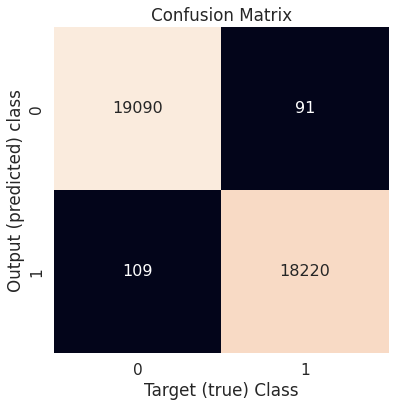

In [57]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score

conf_mat = confusion_matrix(y_test, y_pred)

#plot_confusion_matrix(estimator=model, X=test_images_norm, y_true=test_labels )
plt.subplots(figsize=(6,6))
sn.set(font_scale=1.4) # for label size
sn.heatmap(conf_mat, annot=True, fmt=".0f", annot_kws={"size": 16}, cbar=False) # font size
plt.xlabel('Target (true) Class'); plt.ylabel('Output (predicted) class'); plt.title('Confusion Matrix')
plt.show()

In [58]:
f1_score(y_test, y_pred, average='micro')

0.9946680885097308